> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：noshow调查数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [253]:
# 用这个框对你计划使用的所有数据包进行设置
# 导入语句
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 务必包含一个‘magic word’，以便将你的视图显示出来
% matplotlib inline

# magicwords的说明：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [254]:
### TODO 1 输入文件
file = 'noshowappointments-kagglev2-may-2016.csv'

In [255]:
# 加载数据并打印几行。进行这几项操作，来检查数据
df = pd.read_csv(file)
print(df.columns)
# 看下都有哦那些列
df.head(50)
# 看下100行，可以粗略的看下NaN和各feature的情况

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [256]:
df.shape

(110527, 14)

In [257]:
df[df['No-show'] == 'No'].shape[0]
# 筛选出No-show为No的（来了的）

88208

## 问题1 noshow比率和男女有关么？

In [258]:
myes = df[(df['No-show'] == 'No')&(df['Gender'] == 'M')].shape[0]
myes
# 筛选出来的的男性

30962

In [259]:
fyes = df[(df['No-show'] == 'No')&(df['Gender'] == 'F')].shape[0]
fyes
# 筛选出来的的男性

57246

In [260]:
genratio = [fyes, myes] / df['Gender'].value_counts()
# 矢量计算
genratio

F    0.796854
M    0.800321
Name: Gender, dtype: float64

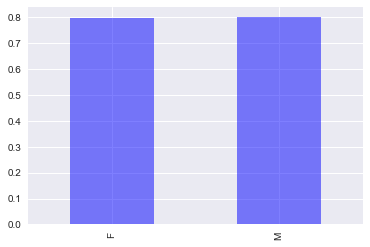

In [261]:
genratio.plot(kind = 'bar', color = 'b', alpha = 0.5);
# 将genratio调用plot参数是br图，蓝色，透明度=50%
# pandas的方法画图

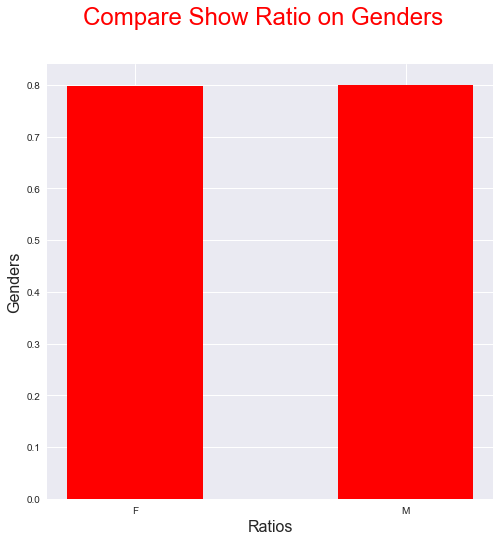

In [277]:
# 使用matplotlib方法
y = list(genratio.values)
# y就是bar图的高度，用valuses生成
x = range(len(genratio))
# x是bar图的个数，用range生成
w = 1/2

fig = plt.figure(figsize=(8,8))
# 创建画纸
ax = fig.add_subplot(1,1,1)
# 创建画图
ax.bar(x, y,color = 'r', width = w)
# 将x，y输入到画图中，bar图，可以定义宽，对其align = 'center'这样的
plt.xticks(range(2), genratio.keys())
# 可以使用plt.xticks一并设置ax.set_xstics和ax.set_xticklabels

ax.set_ylabel('Genders', fontsize = 16)
ax.set_xlabel('Ratios', fontsize = 16)
fig.suptitle('Compare Show Ratio on Genders',
             fontsize = 24, color = 'red');
# 记住在最后的语句后面加个；就不会显示图之外的信息，比较友好

In [263]:
genratio.values[0]

0.7968541202672605

In [264]:
#  类型，以及是否有缺失数据或错误数据的情况
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [265]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [266]:
print(df.shape)
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.shape)
print(df.duplicated().sum())

(110527, 14)
0
(110527, 14)
0


In [267]:
df.isnull().sum()
round(df.isnull().sum()/df.shape[0],2)

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

## 问题2: nosohow比率和时间的关系

In [268]:
# 数据清理 将AppointmentDay转成datatime格式

In [269]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [270]:
# 首先把列转换成datetime格式
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# 如果格式比较特殊，可以使用format='%y-%d-%y'定义转换的格式
df['ScheduledDay'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [271]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay            object
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [272]:
df['ScheduledDay'].dt.date
# 使用data筛选出数据中的天

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
5         2016-04-27
6         2016-04-27
7         2016-04-27
8         2016-04-29
9         2016-04-27
10        2016-04-27
11        2016-04-26
12        2016-04-28
13        2016-04-28
14        2016-04-28
15        2016-04-26
16        2016-04-28
17        2016-04-28
18        2016-04-26
19        2016-04-29
20        2016-04-27
21        2016-04-27
22        2016-04-25
23        2016-04-28
24        2016-04-29
25        2016-04-26
26        2016-04-29
27        2016-04-27
28        2016-04-29
29        2016-04-29
             ...    
110497    2016-06-01
110498    2016-06-08
110499    2016-06-01
110500    2016-06-08
110501    2016-06-01
110502    2016-06-08
110503    2016-06-01
110504    2016-06-08
110505    2016-06-01
110506    2016-06-01
110507    2016-06-08
110508    2016-06-01
110509    2016-06-08
110510    2016-06-01
110511    2016-06-08
110512    2016-06-08
110513    201

In [273]:
sdate = df['ScheduledDay'].dt.date.value_counts()
# 好像挺奇怪的数据，有的日期特别多，有的特别少
# 因为dfdate是个Series（df的每一列都是Series）
print(type(dfdate))
# 我们可以使用sort_index()来排序
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html
sdate = dfdate.sort_index()

<class 'pandas.core.series.Series'>


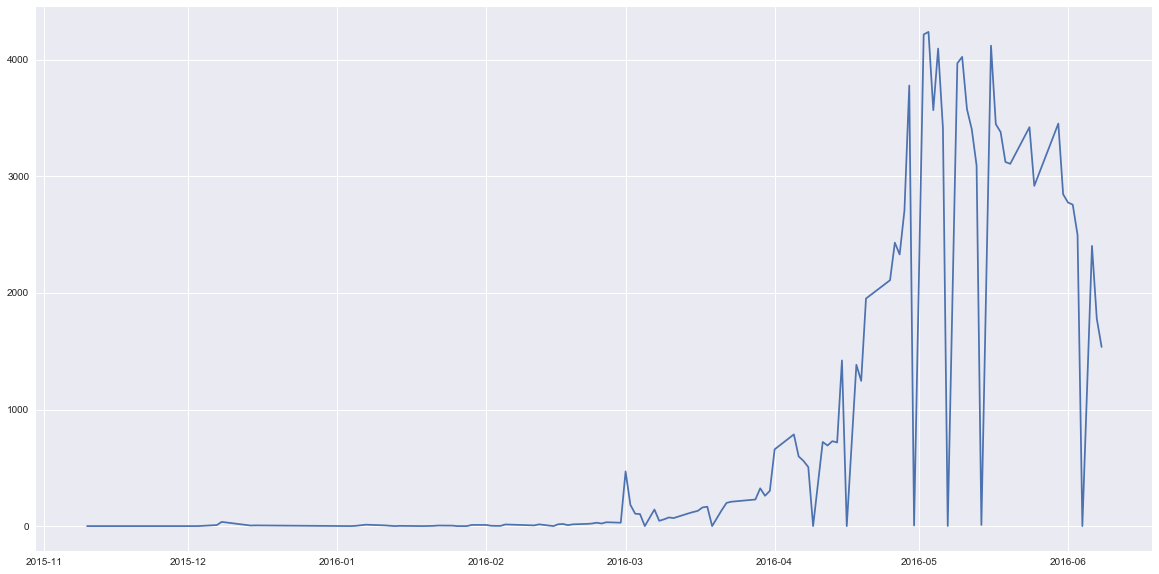

In [274]:
sdate.plot.line(figsize = (20,10));
# Series可以使用plot方式画line图的
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot
# 从图中可以看出记录noshow系统的数据在2016年之后的日子使用的很多
# 也可以把数据进行清理，把2016年3月之前的都干掉，就比较好看了
# title什么的可以使用matplotlib的方式添加

In [275]:
# 发现2 budget 和 revenue有一些关系，但是没有那么明显
dfdate.plot(x='budget_adj',
            y='revenue_adj', kind='scatter', alpha=0.3);

ValueError: plot kind 'scatter' can only be used for data frames

In [ ]:
df.groupby(df['ScheduledDay'].dt.date)

In [ ]:
plt.hist(df['ScheduledDay'].dt.date.value_counts(),color='r', alpha = 0.5)
plt.show()

In [ ]:
df['day'] = 

In [ ]:
# 1 清理无用列
# buget \ revenue 使用adj调整后数值，丢弃
# imdb id 与 id作用相同，丢弃
# homepage 缺失很多，其中的内容
print(df.shape)
drop_list = ['budget', 'revenue', 'imdb_id']
df.drop(drop_list, axis = 1, inplace = True)
print(df.shape)
df.columns

In [ ]:
# 2 调整列
# homepage 缺失很多，但突然想看看是不是有homepage的
# 有更加多的投入和收入（因为重视么）
# 显示最有一列是谁（碰巧了在最后就不用都输出了）
if 'homepage' in df.columns:
    df['has_homepage'] = df['homepage'].notnull()
    df.drop('homepage', axis = 1, inplace = True)
else:
    print('data already processed')
# 写了个小循环如果执行过就提示下不会报错
# 万一评审老师点了两次，报错了不是会很尴尬的
# 开玩笑了，提交项目是html文件，但是自己用起来方便
print(df.columns[-1:])
df.head()

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1 几数字值的关系如何

In [ ]:
# 先把需要保留的列列出来
smlist = ['popularity','vote_average','budget_adj','revenue_adj']
# 制作一个新的数据用于scater matirx显示（否则太慢了，也看不太清）
dfsm = pd.DataFrame()
for i in smlist:
    dfsm[i] = df[i]
dfsm.head()

In [ ]:
# OK 我们接下来就可以画个scater matrix图来看看了
pd.plotting.scatter_matrix(dfsm, figsize=(20,20));

In [ ]:
# 画完图之后，发现有的图有个别值分布的特别大，此处应该考虑删除掉异常值（朝纲了）

In [ ]:
# 那么我们回来看下个个参数的分布
dfsm.hist(figsize=(10,10));

In [ ]:
# 发现除了vote average之外，右侧都有少数超长值
dfsm.describe()

In [ ]:
# 好奇怪 popu的几个数值都超低的，我来检查下
dfsm['popularity'].sort_values()
# 居然真的是很小

In [ ]:
# 检查百分位的值
# 那么我们查查几个百分位的数值吧，使用linspace每隔5%显示一下！
# dfsm['popularity'].quantile(np.linspace(0,1,21))
# linspace 是0到1的n个点之间的分割，因为有开始结束所以要增加1个，比如21
# 可以看出来过了只有15%的数值超过了1，Max真是太大了
# 这个数值画图意义也不是特别明显

# 干脆我们写个函数把其他的quantile也看一下
# 把平均分为几个作为n值输入
def vquantile(data, n):
    for i in data:
        quantile = data[i].quantile(np.linspace(0,1,n+1))
        print('\n', 'Checking:', i , '\n', quantile)

vquantile(dfsm, 10)

In [ ]:
# 根据上面的输出，发现budget有很多空的，特别不靠谱，我要干掉它们
print(len(dfsm[dfsm['budget_adj'] == 0]))
print(dfsm.shape)
# 干脆把budget和revenue的空值都干掉
dfsm5k = dfsm[(dfsm['revenue_adj'] != 0)&(dfsm['budget_adj'] != 0)]
dfsm5k.shape

In [ ]:
# 干掉了60%的数据，实际处理时候要慎重，不过数值就好看多了
# ps：同时也要小心对数据好看的追求，不要太极端了多删了数据
print(vquantile(dfsm5k, 10))

In [ ]:
# 来个hist再看看
dfsm5k.hist(figsize=(10,10));
# 好看多了

In [ ]:
# 再看看scater
pd.plotting.scatter_matrix(dfsm5k, figsize=(20,20));

In [ ]:
# 发现1 vote 和 pop有关系的
dfsm5k.plot(x='vote_average',
            y='popularity', kind='scatter', alpha=0.3);
# 要不要美化一下，少年？

In [ ]:
# 发现2 budget 和 revenue有一些关系，但是没有那么明显
dfsm5k.plot(x='budget_adj',
            y='revenue_adj', kind='scatter', alpha=0.3);

In [ ]:
dfsm.head()

In [ ]:
dfsm5k.head()

In [ ]:
# 最后的图：
# # 先是设定图纸和图画位置
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# # 把数据加载到图中
x1 = dfsm5k['vote_average']
y1 = dfsm5k['popularity']
x2 = dfsm5k['budget_adj']
y2 = dfsm5k['revenue_adj']

ax1.scatter(x1, y1, color = 'b', alpha = 0.2, label = "All")
ax2.scatter(x2, y2, color = 'b', alpha = 0.2, label = "All")

# # label、title等的细化
ax1.set_ylabel('Vote Average', fontsize = 16)
ax1.set_xlabel('Popularity', fontsize = 16)
ax2.set_ylabel('Budget', fontsize = 16)
ax2.set_xlabel('Revenue', fontsize = 16)

fig.suptitle('Scater on Vote/Pop and Budg/Rev',
             fontsize = 24, color = 'red');

# # 其实散点图是可以把分组加进去的（比如homepage有没有）找到一个：
# # https://pythonspot.com/en/tag/scatter-plot/
# # 大家有需要的可以试试

### 研究问题2 是否有Website和Feature的关系

In [ ]:
# 继续使用删除了budget和rev为0的（和钱都没关系的不分析了吧）
smlist2 = ['popularity','vote_average','budget_adj','revenue_adj', 'has_homepage']
# 制作一个新的数据用于scater matirx显示（否则太慢了，也看不太清）
dfsm2 = pd.DataFrame()
for i in smlist2:
    dfsm2[i] = df[i]
dfsm2.head()

In [ ]:
# 接下来一样干掉空值的项
# 根据上面的输出，发现budget有很多空的，特别不靠谱，我要干掉它们
print(len(dfsm2[dfsm2['budget_adj'] == 0]))
print(dfsm2.shape)

# 干脆把revenue的空值也干掉
dfsm25k = dfsm2[(dfsm2['revenue_adj'] != 0)&(dfsm2['budget_adj'] != 0)]
dfsm25k.shape

In [ ]:
# 来个hist再看看
dfsm25k.hist(figsize=(10,10));
# 看看True和False还是按照0和1处理的，而且数量分布不错，嗨森！

In [ ]:
mean = dfsm25k.groupby('has_homepage').mean()
mean
# 可以看出来区别还是很大的

In [ ]:
# 我们来画图试试，结果相差太多，前两个基本看不到啊
dfsm25k.groupby('has_homepage').mean().iloc[0].plot(
    kind = 'bar', alpha = 0.7, color = 'b');

In [ ]:
# 把数据都搞到一个数量级好了
mean_edited = mean.copy()
# 需要注意如果不用.copy()的话修改mean_edited 也会修改mean
mean_edited['budget_adj'] = mean['budget_adj'] / 10000000
mean_edited['revenue_adj'] = mean['revenue_adj'] / 10000000
mean_edited

In [ ]:
mean_edited.iloc[1] / mean_edited.iloc[0]
# 我们来看看变化有多少，pop和rev的增幅都超过了50%

In [ ]:
# 堆叠起来看看，不是特别理想
mean_edited.iloc[0].plot(kind = 'bar', color = 'r', alpha = 0.3)
mean_edited.iloc[1].plot(kind = 'bar', color = 'b', alpha = 0.3);

In [ ]:
# 那只好认真的画图了，开始想到了折线图，但是这4个指标没有延续的关系
# 折线图比较适合画x轴为时间的数据
sns.set(context = 'notebook', style = 'darkgrid')
# 使用sns设置底色要放在最前面
fig = plt.figure(figsize=(8,8))
# 如果使用是import的是matplotlib 而不是 matplotlib.pyplot
# 调用的时候会有区别
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(mean_edited.iloc[0]))
# 要想微调位置要设置个变量ind
w = 0.3
# bar的宽度也是可以设定的
ax.bar(ind, mean_edited.iloc[0], color = 'r',
       alpha = 0.7, width = w, label = "Homepage No")
ax.bar(ind+w, mean_edited.iloc[1], color = 'b',
       alpha = 0.7, width = w, label = "Homepage Yes")
#ind是bar的位置，datared是输入的数据，多个width是bar的宽度
ax.legend(loc = 'best', fontsize = 12)
ax.set_xticks(ind+w/2)
# 设定x轴标签位置，在正中间
# 根据你要堆叠的数据设定
mean_lable = ['Popularity','Vote Average',
              'Budget/10^7', 'Revenue/10^7']
# 把标签设定为比较友好的方式
# 也可以导出index处理，比写死了好，有没有兴趣优化一下？
ax.set_xticklabels(mean_lable)
# 将分类标签作为x标签

ax.set_ylabel('Values', fontsize = 16)
ax.set_xlabel('Features', fontsize = 16)
fig.suptitle('Compare Features on Homepage or Not',
             fontsize = 24, color = 'red');
# 记住在最后的语句后面加个；就不会显示图之外的信息，比较友好

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

### 研究问题 1 几个值为数字的值关系如何

## 研究问题 2 电影是否有Website和revenue以及budget的关系